# Company: Massimo Dutti

In [1]:
! pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8a81b363f28c4f20d29096ef0c9e7e32ace67cc46ce37de36b4dc9463682b772
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:
import gensim
from gensim.models import ldamulticore
from pprint import pprint
from gensim.models import coherencemodel

In [3]:
import pandas as pd
import numpy as np

from ast import literal_eval

In [4]:
import nltk; nltk.download('stopwords')
import re
from pprint import pprint
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from nltk.tokenize import word_tokenize

In [6]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [7]:
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [8]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec

In [9]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [10]:
df = pd.read_excel('/content/GV_Output.xlsx')

In [11]:
df

,URL,Labels
0,URL,NaN
1,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...
2,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...
4,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...
...,...,...
497,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Brown Liquid Eye Cosmetics Fluid Solution Font...
499,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...
500,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Leg Flash photography Sleeve Dress Comfort Thi...


In [12]:
df = df.iloc[1:, :]

In [13]:
df

,URL,Labels
1,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...
2,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...
4,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...
5,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoe Shoulder Leg Hat One-piece garment Smile ...
...,...,...
497,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Brown Liquid Eye Cosmetics Fluid Solution Font...
499,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...
500,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Leg Flash photography Sleeve Dress Comfort Thi...


# Topic Modeling

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
stop = stopwords.words('english')
df['Labels'] = df['Labels'].astype(str)
df['label_tokens'] = df['Labels'].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df['label_tokens'] = df['label_tokens'].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
df

,URL,Labels,label_tokens
1,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi..."
2,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ..."
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev..."
4,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...,"[joint, shoe, shoulder, leg, neck, sleeve, kne..."
5,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoe Shoulder Leg Hat One-piece garment Smile ...,"[shoe, shoulder, leg, hat, one, piece, garment..."
...,...,...,...
497,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...,"[rectangle, font, circle, beige, logo, eyelash..."
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Brown Liquid Eye Cosmetics Fluid Solution Font...,"[brown, liquid, eye, cosmetics, fluid, solutio..."
499,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...,"[liquid, fluid, road, surface, wall, water, sa..."
500,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Leg Flash photography Sleeve Dress Comfort Thi...,"[leg, flash, photography, sleeve, dress, comfo..."


In [17]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

In [18]:
def get_corpus(df):
    bigram = bigrams(df.label_tokens)
    bigram = [bigram[review] for review in df.label_tokens]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [19]:
train_corpus, train_id2word, bigram_train = get_corpus(df)

# Finding optimal number of topics

In [20]:
df.label_tokens[1]

['suit',
 'trousers',
 'chin',
 'shirt',
 'neck',
 'dress',
 'shirt',
 'flash',
 'photography',
 'sleeve',
 'grey',
 'collar',
 'style']

In [21]:
for k in range(2,20):
  print('k = ' + str(k))
  LDA = gensim.models.ldamulticore.LdaMulticore
  ldamodel = LDA(corpus = train_corpus,
      num_topics = k,
      id2word = train_id2word,
      iterations = 100,
      chunksize = 10000,
      workers = 7,
      passes = 20,
      eval_every = 10,
      per_word_topics = True
  )
  ldamodel.save(f"ldamodel_for_{k}topics_Run_10")
  pprint(ldamodel.print_topics())



k = 2
[(0,
  '0.050*"black" + 0.045*"white" + 0.039*"sky" + 0.037*"plant" + '
  '0.033*"people_nature" + 0.029*"lip" + 0.027*"happy" + 0.025*"outerwear" + '
  '0.024*"hairstyle" + 0.022*"gesture"'),
 (1,
  '0.078*"waist" + 0.060*"leg" + 0.055*"collar" + 0.051*"dress_shirt" + '
  '0.050*"shoulder" + 0.047*"knee" + 0.041*"gesture" + 0.038*"design" + '
  '0.035*"thigh" + 0.028*"shoe"')]
k = 3
[(0,
  '0.095*"black" + 0.083*"white" + 0.048*"leg" + 0.046*"comfort" + '
  '0.044*"gesture" + 0.040*"standing" + 0.040*"wood" + 0.039*"style" + '
  '0.035*"human" + 0.034*"thigh"'),
 (1,
  '0.055*"sky" + 0.047*"people_nature" + 0.041*"lip" + 0.040*"shoulder" + '
  '0.039*"hairstyle" + 0.039*"hair" + 0.039*"plant" + 0.030*"water" + '
  '0.028*"face" + 0.028*"happy"'),
 (2,
  '0.094*"waist" + 0.078*"dress_shirt" + 0.073*"collar" + 0.048*"shoulder" + '
  '0.048*"gesture" + 0.045*"leg" + 0.044*"knee" + 0.041*"design" + '
  '0.032*"blazer" + 0.032*"outerwear"')]
k = 4
[(0,
  '0.093*"waist" + 0.075*"colla

In [22]:
coherence = []
for k in range(2, 20):
  LDA = gensim.models.ldamulticore.LdaMulticore
  ldamodel = LDA.load(f'ldamodel_for_{k}topics_Run_10')
  cm = gensim.models.coherencemodel.CoherenceModel(model = ldamodel, texts = bigram_train, dictionary = train_id2word, coherence = 'c_v')
  coherence.append((k, 'default', 'default', cm.get_coherence()))

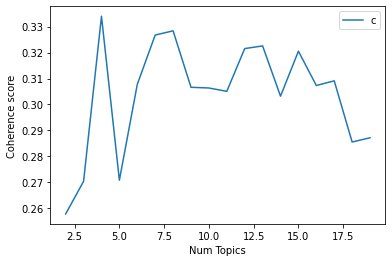

In [23]:
pd.DataFrame(coherence, columns = ['LDA_model', 'alpha', 'eta', 'coherence_score']).to_csv('coherence_matrix.csv', index = False)
mat = pd.read_csv('coherence_matrix.csv')
mat.reset_index(drop = True)
x= range(2,20)
plt.plot(x, mat['coherence_score'])
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc = 'best')
plt.show()

The ideal number of topics is 7 (highest coherence score). I found this number by iterating through values of k (representing the number of topics for the LDA model) from 2 to 20.

In [24]:
import math

In [25]:
k = 7
insta_lda = LDA(train_corpus, num_topics = k, id2word = train_id2word, passes=20)

def plot_top_words(lda=insta_lda, nb_topics=k, nb_words=25):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.25, hspace=0.25)
    plt.figure(figsize=(45,40))
    
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='orange', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic: "+str(i))


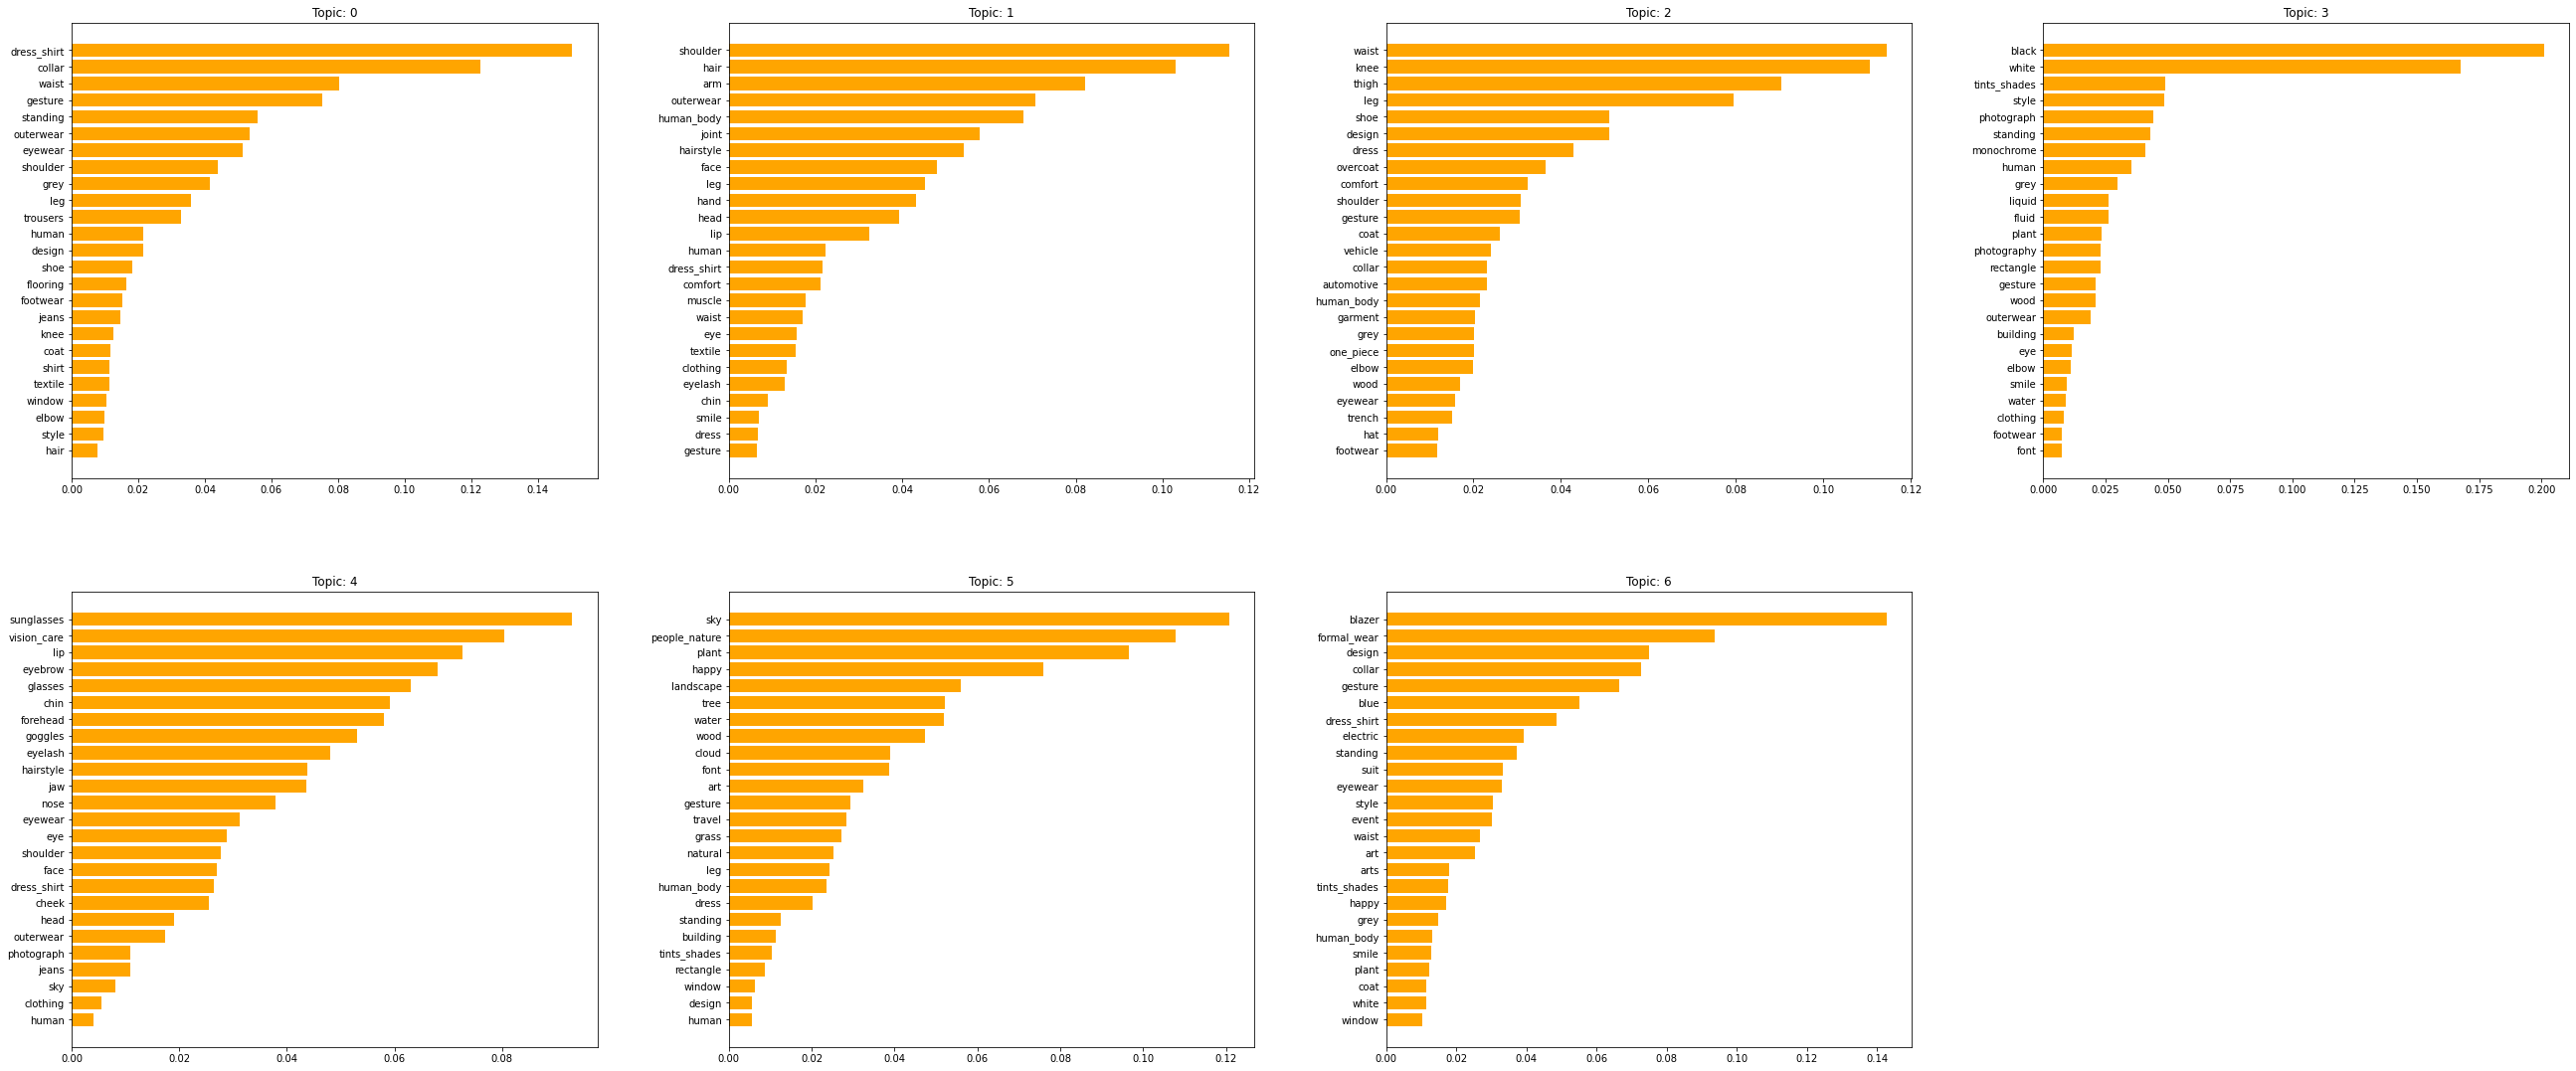

In [26]:
plot_top_words()

### Topic names: 

Topic 0: dress shirt

Topic 1: modeling


Topic 2: outerwear

Topic 3: vintage

Topic 4: eyewear

Topic 5: nature

Topic 6: formal wear

# Engagement

In [27]:
df

,URL,Labels,label_tokens
1,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi..."
2,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ..."
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev..."
4,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...,"[joint, shoe, shoulder, leg, neck, sleeve, kne..."
5,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoe Shoulder Leg Hat One-piece garment Smile ...,"[shoe, shoulder, leg, hat, one, piece, garment..."
...,...,...,...
497,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...,"[rectangle, font, circle, beige, logo, eyelash..."
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Brown Liquid Eye Cosmetics Fluid Solution Font...,"[brown, liquid, eye, cosmetics, fluid, solutio..."
499,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...,"[liquid, fluid, road, surface, wall, water, sa..."
500,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Leg Flash photography Sleeve Dress Comfort Thi...,"[leg, flash, photography, sleeve, dress, comfo..."


In [28]:
comments = pd.read_excel('/content/Insta_download.xlsx')

In [29]:
comments

,Caption,Comments,URL
0,SPECIAL MOMENTS | Some events can change your ...,19,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....
1,SPECIAL MOMENTS | Smarten up. New Collection a...,7,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....
2,SPECIAL MOMENTS | Dress Code: Contemporary Coo...,10,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....
3,MOMENTS | New reflections on occasion wear. No...,29,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....
4,MOMENTS | Shape your future memories in monoch...,32,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....
...,...,...,...
496,THE BODY CARE COLLECTION. Juniper Berry & Ging...,6,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....
497,THE BODY CARE COLLECTION. Cotton & Green Sage....,24,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....
498,THE BODY CARE COLLECTION. Chamomile & Sandalwo...,10,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....
499,LINEN WOMAN | | Vibrant colors to live your su...,8,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....


In [30]:
insta_lda.print_topics()

[(0,
  '0.150*"dress_shirt" + 0.123*"collar" + 0.080*"waist" + 0.075*"gesture" + 0.056*"standing" + 0.053*"outerwear" + 0.051*"eyewear" + 0.044*"shoulder" + 0.041*"grey" + 0.036*"leg"'),
 (1,
  '0.115*"shoulder" + 0.103*"hair" + 0.082*"arm" + 0.071*"outerwear" + 0.068*"human_body" + 0.058*"joint" + 0.054*"hairstyle" + 0.048*"face" + 0.045*"leg" + 0.043*"hand"'),
 (2,
  '0.114*"waist" + 0.111*"knee" + 0.090*"thigh" + 0.079*"leg" + 0.051*"shoe" + 0.051*"design" + 0.043*"dress" + 0.037*"overcoat" + 0.032*"comfort" + 0.031*"shoulder"'),
 (3,
  '0.201*"black" + 0.167*"white" + 0.049*"tints_shades" + 0.049*"style" + 0.044*"photograph" + 0.043*"standing" + 0.041*"monochrome" + 0.036*"human" + 0.030*"grey" + 0.026*"liquid"'),
 (4,
  '0.093*"sunglasses" + 0.080*"vision_care" + 0.073*"lip" + 0.068*"eyebrow" + 0.063*"glasses" + 0.059*"chin" + 0.058*"forehead" + 0.053*"goggles" + 0.048*"eyelash" + 0.044*"hairstyle"'),
 (5,
  '0.121*"sky" + 0.108*"people_nature" + 0.097*"plant" + 0.076*"happy" + 0.

In [31]:
df_lda = pd.DataFrame(insta_lda.print_topics(), columns = ['Topic', 'Weights'])

In [32]:
df_lda

,Topic,Weights
0,0,"0.150*""dress_shirt"" + 0.123*""collar"" + 0.080*""..."
1,1,"0.115*""shoulder"" + 0.103*""hair"" + 0.082*""arm"" ..."
2,2,"0.114*""waist"" + 0.111*""knee"" + 0.090*""thigh"" +..."
3,3,"0.201*""black"" + 0.167*""white"" + 0.049*""tints_s..."
4,4,"0.093*""sunglasses"" + 0.080*""vision_care"" + 0.0..."
5,5,"0.121*""sky"" + 0.108*""people_nature"" + 0.097*""p..."
6,6,"0.143*""blazer"" + 0.094*""formal_wear"" + 0.075*""..."


In [33]:
df_lda.to_csv('topic_weights.csv')

In [34]:
train_vecs = []
for i in range(len(df.label_tokens)):
    top_topics = insta_lda.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(len(top_topics))]
    train_vecs.append(topic_vec)

In [35]:
len(train_vecs)

501

In [36]:
train_vec_df = pd.DataFrame(train_vecs)
train_vec_df.columns = ['Topic_' + str(i) for i in range(7)]

In [37]:
train_vec_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,0.791523,0.015893,0.015880,0.015942,0.128906,0.015873,0.015984
1,0.877323,0.020476,0.020478,0.020435,0.020421,0.020428,0.020438
2,0.393667,0.020417,0.504167,0.020408,0.020415,0.020412,0.020514
3,0.015910,0.015974,0.904594,0.015875,0.015881,0.015877,0.015890
4,0.014329,0.014338,0.914099,0.014312,0.014294,0.014300,0.014328


# Joining dataframes

In [38]:
df.head(3)

,URL,Labels,label_tokens
1,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi..."
2,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ..."
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev..."


In [39]:
comments.head(3)

,Caption,Comments,URL
0,SPECIAL MOMENTS | Some events can change your ...,19,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....
1,SPECIAL MOMENTS | Smarten up. New Collection a...,7,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....
2,SPECIAL MOMENTS | Dress Code: Contemporary Coo...,10,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....


In [40]:
df = df.reset_index(drop = True)
df.head(3)

,URL,Labels,label_tokens
0,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi..."
1,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ..."
2,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev..."


In [41]:
df

,URL,Labels,label_tokens
0,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi..."
1,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ..."
2,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev..."
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...,"[joint, shoe, shoulder, leg, neck, sleeve, kne..."
4,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoe Shoulder Leg Hat One-piece garment Smile ...,"[shoe, shoulder, leg, hat, one, piece, garment..."
...,...,...,...
496,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...,"[rectangle, font, circle, beige, logo, eyelash..."
497,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Brown Liquid Eye Cosmetics Fluid Solution Font...,"[brown, liquid, eye, cosmetics, fluid, solutio..."
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...,"[liquid, fluid, road, surface, wall, water, sa..."
499,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Leg Flash photography Sleeve Dress Comfort Thi...,"[leg, flash, photography, sleeve, dress, comfo..."


In [42]:
merged_inner = pd.merge(left = df, right = comments, left_on = 'URL', right_on = 'URL')
merged_inner.head(10)

,URL,Labels,label_tokens,Caption,Comments
0,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi...",SPECIAL MOMENTS | Some events can change your ...,19
1,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ...",SPECIAL MOMENTS | Smarten up. New Collection a...,7
2,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev...",SPECIAL MOMENTS | Dress Code: Contemporary Coo...,10
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...,"[joint, shoe, shoulder, leg, neck, sleeve, kne...",MOMENTS | New reflections on occasion wear. No...,29
4,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoe Shoulder Leg Hat One-piece garment Smile ...,"[shoe, shoulder, leg, hat, one, piece, garment...",MOMENTS | Shape your future memories in monoch...,32
5,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Face Outerwear Sleeve Gesture Street fashion C...,"[face, outerwear, sleeve, gesture, street, fas...",MOMENTS | High-shine satin and elevated knits....,29
6,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Clothing Hairstyle Shoulder Facial expression ...,"[clothing, hairstyle, shoulder, facial, expres...",THE SWIMWEAR EDIT | Perfect travelling compani...,9
7,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Glasses Water Sky Vision care Shoulder Shorts ...,"[glasses, water, sky, vision, care, shoulder, ...",THE SWIMWEAR EDIT | Colors that make a splash....,5
8,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Clothing Wheel Tire Car Vehicle Shorts Motor v...,"[clothing, wheel, tire, car, vehicle, shorts, ...",THE SWIMWEAR EDIT | Take a dip dive into holid...,2
9,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Face Shoe Leg Comfort Flash photography Sleeve...,"[face, shoe, leg, comfort, flash, photography,...",INSIDE LA COLOMBE D’OR | Mastering the art of ...,8


In [43]:
merged_inner.shape

(501, 5)

In [44]:
final_df = pd.concat([merged_inner.reset_index(drop = True), train_vec_df.reset_index(drop  =True)], axis = 1)
final_df

,URL,Labels,label_tokens,Caption,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Suit trousers Chin Shirt Neck Dress shirt Flas...,"[suit, trousers, chin, shirt, neck, dress, shi...",SPECIAL MOMENTS | Some events can change your ...,19,0.791523,0.015893,0.015880,0.015942,0.128906,0.015873,0.015984
1,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ...",SPECIAL MOMENTS | Smarten up. New Collection a...,7,0.877323,0.020476,0.020478,0.020435,0.020421,0.020428,0.020438
2,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev...",SPECIAL MOMENTS | Dress Code: Contemporary Coo...,10,0.393667,0.020417,0.504167,0.020408,0.020415,0.020412,0.020514
3,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Shoe Shoulder Leg Neck Sleeve Knee Waist...,"[joint, shoe, shoulder, leg, neck, sleeve, kne...",MOMENTS | New reflections on occasion wear. No...,29,0.015910,0.015974,0.904594,0.015875,0.015881,0.015877,0.015890
4,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoe Shoulder Leg Hat One-piece garment Smile ...,"[shoe, shoulder, leg, hat, one, piece, garment...",MOMENTS | Shape your future memories in monoch...,32,0.014329,0.014338,0.914099,0.014312,0.014294,0.014300,0.014328
...,...,...,...,...,...,...,...,...,...,...,...,...
496,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...,"[rectangle, font, circle, beige, logo, eyelash...",THE BODY CARE COLLECTION. Juniper Berry & Ging...,6,0.023810,0.023850,0.023810,0.024003,0.177605,0.378681,0.348241
497,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Brown Liquid Eye Cosmetics Fluid Solution Font...,"[brown, liquid, eye, cosmetics, fluid, solutio...",THE BODY CARE COLLECTION. Cotton & Green Sage....,24,0.020411,0.020432,0.020421,0.877299,0.020454,0.020570,0.020414
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...,"[liquid, fluid, road, surface, wall, water, sa...",THE BODY CARE COLLECTION. Chamomile & Sandalwo...,10,0.190380,0.023827,0.023810,0.690294,0.023817,0.024030,0.023842
499,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Leg Flash photography Sleeve Dress Comfort Thi...,"[leg, flash, photography, sleeve, dress, comfo...",LINEN WOMAN | | Vibrant colors to live your su...,8,0.015895,0.015887,0.904696,0.015878,0.015873,0.015882,0.015889


In [45]:
sorted_df = final_df.sort_values(by = ['Comments'], ascending = False)
sorted_df.head(5)

,URL,Labels,label_tokens,Caption,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
65,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Joint Sheath dress Hand One-piece garment Arm ...,"[joint, sheath, dress, hand, one, piece, garme...",ICONS | THE LEATHER: Its power to impact is st...,423,0.014299,0.314351,0.614190,0.014287,0.014286,0.014299,0.014288
278,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Human body Coat Sleeve Waist Collar Suit Thigh...,"[human, body, coat, sleeve, waist, collar, sui...",LIMITED EDITION FW21. Women's Collection. \nTh...,375,0.017929,0.017911,0.561234,0.017859,0.017858,0.017874,0.349335
276,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Fur clothing Human body Sleeve Gesture Waist O...,"[fur, clothing, human, body, sleeve, gesture, ...",LIMITED EDITION FW21. Women's Collection. \nTh...,252,0.015938,0.015924,0.904543,0.015902,0.015879,0.015893,0.015921
63,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Trousers Leg Dress shirt Human body Sleeve Kne...,"[trousers, leg, dress, shirt, human, body, sle...",ICONS | THE POPLIN SHIRT: From the Oxford to o...,198,0.442531,0.014344,0.485918,0.014289,0.014289,0.014309,0.014319
393,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Hair Joint Jeans Outerwear Hairstyle Shirt Arm...,"[hair, joint, jeans, outerwear, hairstyle, shi...",SORBET CHECK ⎮ Emerald green. All the pieces a...,188,0.014347,0.914168,0.014303,0.014297,0.014310,0.014290,0.014286


In [46]:
lq = np.percentile(final_df.Comments, 25)
hq = np.percentile(final_df.Comments, 75)
print(lq, hq)

11.0 37.0


In [47]:
final_df.Comments.value_counts().sort_values(ascending = False)

8      19
12     19
6      19
13     18
15     17
       ..
105     1
126     1
143     1
128     1
0       1
Name: Comments, Length: 103, dtype: int64

In [48]:
top = final_df[final_df.Comments >= hq]
top

,URL,Labels,label_tokens,Caption,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
22,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Hair Outerwear One-piece garment Arm Shoulder ...,"[hair, outerwear, one, piece, garment, arm, sh...",JOIN LIFE | A new season. A new philosophy. A ...,39,0.014314,0.411341,0.517175,0.014291,0.014293,0.014298,0.014288
30,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Sky Ecoregion Natural environment Human body P...,"[sky, ecoregion, natural, environment, human, ...",LIMITED EDITION SS22. Women’s Collection\nPhot...,41,0.017858,0.017900,0.017904,0.017862,0.017858,0.892751,0.017866
32,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Sky Shoulder Leg People in nature Dress shirt ...,"[sky, shoulder, leg, people, nature, dress, sh...",LIMITED EDITION SS22. Women's Collection\nPhot...,52,0.506789,0.015943,0.015943,0.015878,0.015888,0.413658,0.015901
34,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Sky Arm Human body People in nature Flash phot...,"[sky, arm, human, body, people, nature, flash,...",LIMITED EDITION SS22. Women’s Collection\nPhot...,74,0.015953,0.208896,0.096795,0.015874,0.015874,0.630703,0.015904
38,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Cloud Sky People in nature Flash photography H...,"[cloud, sky, people, nature, flash, photograph...",LIMITED EDITION SS22 | Women's Collection avai...,40,0.017891,0.017860,0.017870,0.017866,0.017858,0.892769,0.017887
...,...,...,...,...,...,...,...,...,...,...,...,...
481,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Fashion Sleeve Flash photography Floor Wood Fa...,"[fashion, sleeve, flash, photography, floor, w...",PERFECT COMPANION | Always stay true to your s...,61,0.259481,0.023813,0.621275,0.023847,0.023810,0.023901,0.023872
482,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Face Hair Joint Hairstyle Shoe Eye Leg Smile C...,"[face, hair, joint, hairstyle, shoe, eye, leg,...",PERFECT COMPANION | A special occasion. Find t...,143,0.014312,0.764335,0.164127,0.014311,0.014314,0.014294,0.014308
483,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Shoulder Dress shirt Neck Flash photography St...,"[shoulder, dress, shirt, neck, flash, photogra...","PERFECT COMPANION | Beautifully cut tailoring,...",57,0.827410,0.028679,0.028830,0.028783,0.028599,0.029106,0.028594
484,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Joint Flash photography Neck Sleeve Wood Thigh...,"[joint, flash, photography, neck, sleeve, wood...",PERFECT COMPANION | Flowing dresses and deep e...,148,0.020439,0.020505,0.877329,0.020428,0.020408,0.020456,0.020435


In [49]:
low = final_df[final_df.Comments <= lq]
low

,URL,Labels,label_tokens,Caption,Comments,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
1,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Footwear Shoulder Leg Dress shirt Neck Flash p...,"[footwear, shoulder, leg, dress, shirt, neck, ...",SPECIAL MOMENTS | Smarten up. New Collection a...,7,0.877323,0.020476,0.020478,0.020435,0.020421,0.020428,0.020438
2,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Dress shirt Flash photography Neck Sleeve Auto...,"[dress, shirt, flash, photography, neck, sleev...",SPECIAL MOMENTS | Dress Code: Contemporary Coo...,10,0.393667,0.020417,0.504167,0.020408,0.020415,0.020412,0.020514
6,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Clothing Hairstyle Shoulder Facial expression ...,"[clothing, hairstyle, shoulder, facial, expres...",THE SWIMWEAR EDIT | Perfect travelling compani...,9,0.017980,0.892626,0.017888,0.017869,0.017888,0.017863,0.017884
7,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Glasses Water Sky Vision care Shoulder Shorts ...,"[glasses, water, sky, vision, care, shoulder, ...",THE SWIMWEAR EDIT | Colors that make a splash....,5,0.015913,0.015930,0.015892,0.015880,0.717230,0.203268,0.015885
8,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Clothing Wheel Tire Car Vehicle Shorts Motor v...,"[clothing, wheel, tire, car, vehicle, shorts, ...",THE SWIMWEAR EDIT | Take a dip dive into holid...,2,0.020430,0.020437,0.877445,0.020428,0.020418,0.020410,0.020432
...,...,...,...,...,...,...,...,...,...,...,...,...
494,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Oval Wall Artifact Art Circle Wood Concrete Sy...,"[oval, wall, artifact, art, circle, wood, conc...",THE BODY CARE COLLECTION. Cotton & Green Sage....,0,0.035719,0.035714,0.035735,0.035750,0.035714,0.785607,0.035760
495,https://instagram.fymq1-2.fna.fbcdn.net/v/t51....,Shoulder Leg Flash photography Sleeve Comfort ...,"[shoulder, leg, flash, photography, sleeve, co...",LINEN MAN | Summer outfits defined by material...,8,0.015919,0.015921,0.904592,0.015904,0.015881,0.015903,0.015880
496,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Rectangle Font Circle Beige Logo Eyelash Brand...,"[rectangle, font, circle, beige, logo, eyelash...",THE BODY CARE COLLECTION. Juniper Berry & Ging...,6,0.023810,0.023850,0.023810,0.024003,0.177605,0.378681,0.348241
498,https://instagram.fymq1-1.fna.fbcdn.net/v/t51....,Liquid Fluid Road surface Wall Water Sand Gas ...,"[liquid, fluid, road, surface, wall, water, sa...",THE BODY CARE COLLECTION. Chamomile & Sandalwo...,10,0.190380,0.023827,0.023810,0.690294,0.023817,0.024030,0.023842


In [50]:
avtop = top.iloc[:, 5:].mean(axis = 0)
avtop

Topic_0    0.126462
Topic_1    0.187764
Topic_2    0.281944
Topic_3    0.069150
Topic_4    0.095937
Topic_5    0.149812
Topic_6    0.088930
dtype: float32

In [51]:
avlow = low.iloc[:, 5:].mean(axis = 0)
avlow

Topic_0    0.188391
Topic_1    0.133833
Topic_2    0.141875
Topic_3    0.125419
Topic_4    0.147948
Topic_5    0.158604
Topic_6    0.103930
dtype: float32

In [52]:
quartop = pd.concat([avtop, avlow], axis = 1)
quartop.columns = ['Top Quartile', 'Bottom Quartile']
quartop

,Top Quartile,Bottom Quartile
Topic_0,0.126462,0.188391
Topic_1,0.187764,0.133833
Topic_2,0.281944,0.141875
Topic_3,0.069150,0.125419
Topic_4,0.095937,0.147948
Topic_5,0.149812,0.158604
Topic_6,0.088930,0.103930


### In the top quartile, the highest weighted topics are topic 2, and topic 1. These correspond to outerwear and modeling, respectively. In the bottom quartile, the highest weighted topics are topic 0 and topic 5. These correspond to dress shirt and nature. Based on these findings, in order to increase engagement, I would recommend Massimo Dutti post more photographs of outerwear and their models (of either gender) in different poses, as those appear to increase engagement with their instagram followers. Photographs pertaining to nature or dress shirts are associated with lower engagement among their followers, thus I would dissuade them from posting such photos frequently.